In [13]:
import numpy as np
import json
import matplotlib.pyplot as plt

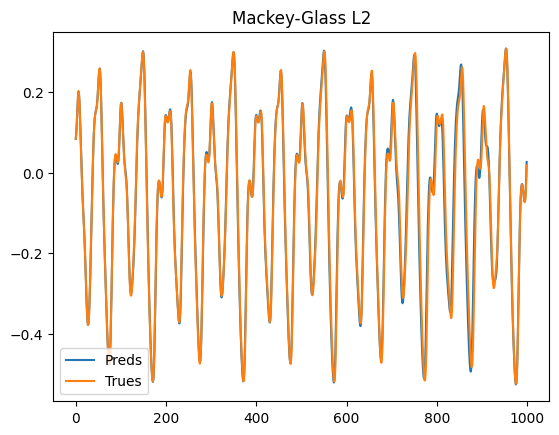

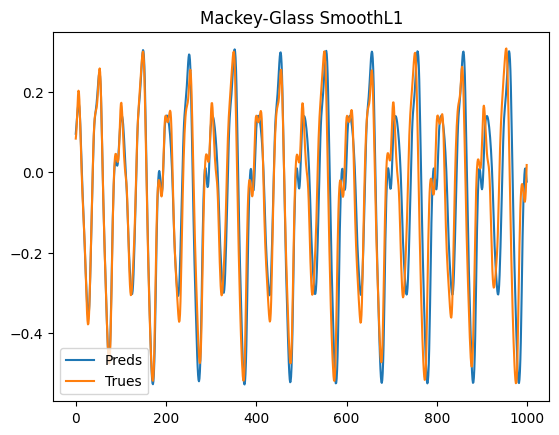

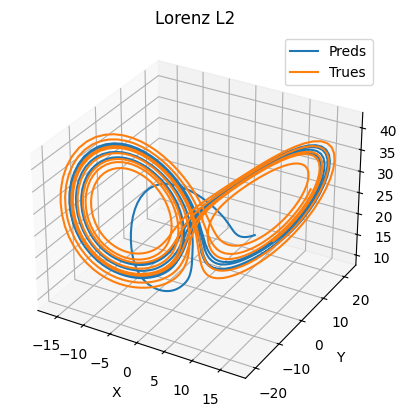

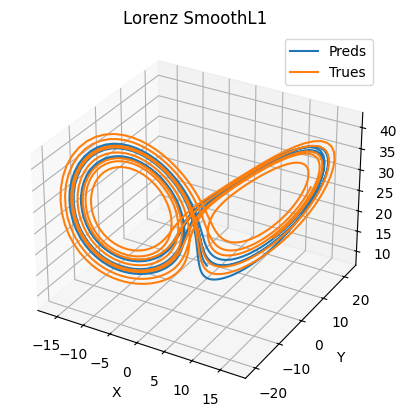

In [37]:
# plot prediction
path = "./results/outputs/"

# mackey-glass
# l2
name = "mg_l2_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

plt.plot(preds, label="Preds")
plt.plot(trues, label="Trues")
plt.legend()
plt.title("Mackey-Glass L2")
plt.show()

# smoothl1
name = "mg_smoothl1_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

plt.plot(preds, label="Preds")
plt.plot(trues, label="Trues")
plt.legend()
plt.title("Mackey-Glass SmoothL1")
plt.show()

# lorenz - 3D plots with origin at middle
# l2
name = "lorenz_l2_"
preds = np.load(path + name + "preds.npy") # (x, y, z)
trues = np.load(path + name + "trues.npy")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(preds[:,0], preds[:,1], preds[:,2], label="Preds")
ax.plot(trues[:,0], trues[:,1], trues[:,2], label="Trues")
ax.set_title("Lorenz L2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
# smoothl1
name = "lorenz_smoothl1_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(preds[:,0], preds[:,1], preds[:,2], label="Preds")
ax.plot(trues[:,0], trues[:,1], trues[:,2], label="Trues")
ax.set_title("Lorenz SmoothL1")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# npy save to csv file 
save_path = "./visualization/"
# mackey-glass
name = "mg_l2_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

np.savetxt(save_path + name + "preds.csv", preds, delimiter=",")
np.savetxt(save_path + name + "trues.csv", trues, delimiter=",")

name = "mg_smoothl1_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

np.savetxt(save_path + name + "preds.csv", preds, delimiter=",")
np.savetxt(save_path + name + "trues.csv", trues, delimiter=",")

# lorenz
name = "lorenz_l2_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

np.savetxt(save_path + name + "preds.csv", preds, delimiter=",")
np.savetxt(save_path + name + "trues.csv", trues, delimiter=",")

name = "lorenz_smoothl1_"
preds = np.load(path + name + "preds.npy")
trues = np.load(path + name + "trues.npy")

np.savetxt(save_path + name + "preds.csv", preds, delimiter=",")
np.savetxt(save_path + name + "trues.csv", trues, delimiter=",")


In [16]:
# sparsity in regression
def get_sparsity(W):
	W = W.flatten()
	sparsity = 1 - np.count_nonzero(W) / len(W)
	return sparsity

# load readout weight
path = "./results/models/"
WO_mg_l2 = np.load(path + "mg_l2_rout_weight.npy")
WO_mg_smoothl1 = np.load(path + "mg_smoothl1_rout_weight.npy")
WO_lorenz_l2 = np.load(path + "lorenz_l2_rout_weight.npy")
WO_lorenz_smoothl1 = np.load(path + "lorenz_smoothl1_rout_weight.npy")

# calculate sparsity
sparsity_mg_l2 = get_sparsity(WO_mg_l2)
sparsity_mg_smoothl1 = get_sparsity(WO_mg_smoothl1)
sparsity_lorenz_l2 = get_sparsity(WO_lorenz_l2)
sparsity_lorenz_smoothl1 = get_sparsity(WO_lorenz_smoothl1)


print("sparsity_mg_l2:", sparsity_mg_l2)
print("sparsity_mg_smoothl1:", sparsity_mg_smoothl1)
print("sparsity_lorenz_l2:", sparsity_lorenz_l2)
print("sparsity_lorenz_smoothl1:", sparsity_lorenz_smoothl1)


sparsity_mg_l2: 0.0040000000000000036
sparsity_mg_smoothl1: 0.654
sparsity_lorenz_l2: 0.0
sparsity_lorenz_smoothl1: 0.5306666666666666


In [ ]:
# error mean and std
path = "./results/outputs/"
# load output data
mg_l2_outputs = json.load(open(path + "mg_l2_errors.json"))["e_pred_range"]
mg_smoothl1_outputs = json.load(open(path + "mg_smoothl1_errors.json"))["e_pred_range"]
lorenz_l2_outputs = json.load(open(path + "lorenz_l2_errors.json"))["e_pred_range"]
lorenz_smoothl1_outputs = json.load(open(path + "lorenz_smoothl1_errors.json"))["e_pred_range"]

# calculate mean and std and print out
# keep 3 decimal places
print("mg l2, mean: {:.5f}, std: {:.5f}".format(np.mean(mg_l2_outputs), np.std(mg_l2_outputs)))
print("mg smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(mg_smoothl1_outputs), np.std(mg_smoothl1_outputs)))
print("lorenz l2, mean: {:.5f}, std: {:.5f}".format(np.mean(lorenz_l2_outputs), np.std(lorenz_l2_outputs)))
print("lorenz smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(lorenz_smoothl1_outputs), np.std(lorenz_smoothl1_outputs)))

mg l2, mean: 0.023, std: 0.032
mg smoothl1, mean: 0.185, std: 0.050
lorenz l2, mean: 135.762, std: 98.657
lorenz smoothl1, mean: 94.337, std: 26.970


In [22]:
# classification:
# sparsity
def get_sparsity(W):
	W = W.flatten()
	sparsity = 1 - np.count_nonzero(W) / len(W)
	return sparsity

# load readout weight
path = "./results/models/"
WO_har_l2 = np.load(path + "har_l2_rout_weight.npy")
WO_har_smoothl1 = np.load(path + "har_smoothl1_rout_weight.npy")
WO_char_l2 = np.load(path + "char_l2_rout_weight.npy")
WO_char_smoothl1 = np.load(path + "char_smoothl1_rout_weight.npy")

WO_ECG5000_l2 = np.load(path + "ECG5000_l2_rout_weight.npy")
WO_ECG5000_smoothl1 = np.load(path + "ECG5000_smoothl1_rout_weight.npy")
WO_DistalPhalanxOutlineCorrect_l2 = np.load(path + "DistalPhalanxOutlineCorrect_l2_rout_weight.npy")
WO_DistalPhalanxOutlineCorrect_smoothl1 = np.load(path + "DistalPhalanxOutlineCorrect_smoothl1_rout_weight.npy")
WO_Yoga_l2 = np.load(path + "Yoga_l2_rout_weight.npy")
WO_Yoga_smoothl1 = np.load(path + "Yoga_smoothl1_rout_weight.npy")
WO_Strawberry_l2 = np.load(path + "Strawberry_l2_rout_weight.npy")
WO_Strawberry_smoothl1 = np.load(path + "Strawberry_smoothl1_rout_weight.npy")



# calculate sparsity
sparsity_har_l2 = get_sparsity(WO_har_l2)
sparsity_har_smoothl1 = get_sparsity(WO_har_smoothl1)
sparsity_char_l2 = get_sparsity(WO_char_l2)
sparsity_char_smoothl1 = get_sparsity(WO_char_smoothl1)

sparsity_ECG5000_l2 = get_sparsity(WO_ECG5000_l2)
sparsity_ECG5000_smoothl1 = get_sparsity(WO_ECG5000_smoothl1)
sparsity_DistalPhalanxOutlineCorrect_l2 = get_sparsity(WO_DistalPhalanxOutlineCorrect_l2)
sparsity_DistalPhalanxOutlineCorrect_smoothl1 = get_sparsity(WO_DistalPhalanxOutlineCorrect_smoothl1)
sparsity_Yoga_l2 = get_sparsity(WO_Yoga_l2)
sparsity_Yoga_smoothl1 = get_sparsity(WO_Yoga_smoothl1)
sparsity_Strawberry_l2 = get_sparsity(WO_Strawberry_l2)
sparsity_Strawberry_smoothl1 = get_sparsity(WO_Strawberry_smoothl1)

# print sparsity
print("sparsity_har_l2:", sparsity_har_l2)
print("sparsity_har_smoothl1:", sparsity_har_smoothl1)
print("sparsity_char_l2:", sparsity_char_l2)
print("sparsity_char_smoothl1:", sparsity_char_smoothl1)

print("sparsity_ECG5000_l2:", sparsity_ECG5000_l2)
print("sparsity_ECG5000_smoothl1:", sparsity_ECG5000_smoothl1)
print("sparsity_DistalPhalanxOutlineCorrect_l2:", sparsity_DistalPhalanxOutlineCorrect_l2)
print("sparsity_DistalPhalanxOutlineCorrect_smoothl1:", sparsity_DistalPhalanxOutlineCorrect_smoothl1)
print("sparsity_Yoga_l2:", sparsity_Yoga_l2)
print("sparsity_Yoga_smoothl1:", sparsity_Yoga_smoothl1)
print("sparsity_Strawberry_l2:", sparsity_Strawberry_l2)
print("sparsity_Strawberry_smoothl1:", sparsity_Strawberry_smoothl1)


sparsity_har_l2: 0.16700000000000004
sparsity_har_smoothl1: 0.45566666666666666
sparsity_char_l2: 0.050799999999999956
sparsity_char_smoothl1: 0.5342
sparsity_ECG5000_l2: 0.20040000000000002
sparsity_ECG5000_smoothl1: 0.84
sparsity_DistalPhalanxOutlineCorrect_l2: 0.5
sparsity_DistalPhalanxOutlineCorrect_smoothl1: 0.81
sparsity_Yoga_l2: 0.5
sparsity_Yoga_smoothl1: 0.719
sparsity_Strawberry_l2: 0.5
sparsity_Strawberry_smoothl1: 0.808


In [39]:
# accuracy
path = "./results/outputs/"

# load data
har_l2_acc = json.load(open(path + "har_l2_output.json", "r"))["acc_pred"]
har_smoothl1_acc = json.load(open(path + "har_smoothl1_output.json", "r"))["acc_pred"]
char_l2_acc = json.load(open(path + "char_l2_output.json", "r"))["acc_pred"]
char_smoothl1_acc = json.load(open(path + "char_smoothl1_output.json", "r"))["acc_pred"]

ECG5000_l2_acc = json.load(open(path + "ECG5000_l2_output.json", "r"))["acc_pred"]
ECG5000_smoothl1_acc = json.load(open(path + "ECG5000_smoothl1_output.json", "r"))["acc_pred"]
DistalPhalanxOutlineCorrect_l2_acc = json.load(open(path + "DistalPhalanxOutlineCorrect_l2_output.json", "r"))["acc_pred"]
DistalPhalanxOutlineCorrect_smoothl1_acc = json.load(open(path + "DistalPhalanxOutlineCorrect_smoothl1_output.json", "r"))["acc_pred"]
Yoga_l2_acc = json.load(open(path + "Yoga_l2_output.json", "r"))["acc_pred"]
Yoga_smoothl1_acc = json.load(open(path + "Yoga_smoothl1_output.json", "r"))["acc_pred"]
Strawberry_l2_acc = json.load(open(path + "Strawberry_l2_output.json", "r"))["acc_pred"]
Strawberry_smoothl1_acc = json.load(open(path + "Strawberry_smoothl1_output.json", "r"))["acc_pred"]

# calculate mean and std
print("har_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(har_l2_acc), np.std(har_l2_acc)))
print("har_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(har_smoothl1_acc), np.std(har_smoothl1_acc)))
print("char_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(char_l2_acc), np.std(char_l2_acc)))
print("char_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(char_smoothl1_acc), np.std(char_smoothl1_acc)))

print("ECG5000_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(ECG5000_l2_acc), np.std(ECG5000_l2_acc)))
print("ECG5000_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(ECG5000_smoothl1_acc), np.std(ECG5000_smoothl1_acc)))
print("DistalPhalanxOutlineCorrect_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(DistalPhalanxOutlineCorrect_l2_acc), np.std(DistalPhalanxOutlineCorrect_l2_acc)))
print("DistalPhalanxOutlineCorrect_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(DistalPhalanxOutlineCorrect_smoothl1_acc), np.std(DistalPhalanxOutlineCorrect_smoothl1_acc)))
print("Yoga_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(Yoga_l2_acc), np.std(Yoga_l2_acc)))
print("Yoga_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(Yoga_smoothl1_acc), np.std(Yoga_smoothl1_acc)))
print("Strawberry_l2, mean: {:.5f}, std: {:.5f}".format(np.mean(Strawberry_l2_acc), np.std(Strawberry_l2_acc)))
print("Strawberry_smoothl1, mean: {:.5f}, std: {:.5f}".format(np.mean(Strawberry_smoothl1_acc), np.std(Strawberry_smoothl1_acc)))


har_l2, mean: 0.86617, std: 0.00423
har_smoothl1, mean: 0.87696, std: 0.00571
char_l2, mean: 0.97657, std: 0.00502
char_smoothl1, mean: 0.97063, std: 0.00535
ECG5000_l2, mean: 0.93262, std: 0.00168
ECG5000_smoothl1, mean: 0.93129, std: 0.00336
DistalPhalanxOutlineCorrect_l2, mean: 0.70217, std: 0.01909
DistalPhalanxOutlineCorrect_smoothl1, mean: 0.70072, std: 0.00961
Yoga_l2, mean: 0.54740, std: 0.02066
Yoga_smoothl1, mean: 0.65040, std: 0.02151
Strawberry_l2, mean: 0.59081, std: 0.03732
Strawberry_smoothl1, mean: 0.84054, std: 0.02344


In [ ]:
# different params
path = "./results/different_params/"

# load results with smoothl1 regularization
size_result_mg = json.load(open(path + "results_size_r_mg.json", "r"))
size_result_lorenz = json.load(open(path + "results_size_r_lorenz.json", "r"))
size_result_har = json.load(open(path + "results_size_r_har.json", "r"))
size_result_char = json.load(open(path + "results_size_r_char.json", "r"))
size_result_ECG5000 = json.load(open(path + "results_size_r_uni_ECG5000.json", "r"))
size_result_DistalPhalanxOutlineCorrect = json.load(open(path + "results_size_r_uni_DistalPhalanxOutlineCorrect.json", "r"))
size_result_Yoga = json.load(open(path + "results_size_r_uni_Yoga.json", "r"))
size_result_Strawberry = json.load(open(path + "results_size_r_uni_Strawberry.json", "r"))

_key = ["100", "200", "500", "1000"]

# print mean and std
# 100
print("==========================Mean and std for 100=========================")
print("mg, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_mg[_key[0]]), np.std(size_result_mg[_key[0]])))
print("lorenz, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_lorenz[_key[0]]), np.std(size_result_lorenz[_key[0]])))
print("har, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_har[_key[0]]), np.std(size_result_har[_key[0]])))
print("char, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_char[_key[0]]), np.std(size_result_char[_key[0]])))
print("ECG5000, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_ECG5000[_key[0]]), np.std(size_result_ECG5000[_key[0]])))
print("DistalPhalanxOutlineCorrect, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_DistalPhalanxOutlineCorrect[_key[0]]), np.std(size_result_DistalPhalanxOutlineCorrect[_key[0]])))
print("Yoga, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Yoga[_key[0]]), np.std(size_result_Yoga[_key[0]])))
print("Strawberry, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Strawberry[_key[0]]), np.std(size_result_Strawberry[_key[0]])))

# 200
print("==========================Mean and std for 200=========================")
print("mg, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_mg[_key[1]]), np.std(size_result_mg[_key[1]])))
print("lorenz, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_lorenz[_key[1]]), np.std(size_result_lorenz[_key[1]])))
print("har, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_har[_key[1]]), np.std(size_result_har[_key[1]])))
print("char, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_char[_key[1]]), np.std(size_result_char[_key[1]])))
print("ECG5000, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_ECG5000[_key[1]]), np.std(size_result_ECG5000[_key[1]])))
print("DistalPhalanxOutlineCorrect, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_DistalPhalanxOutlineCorrect[_key[1]]), np.std(size_result_DistalPhalanxOutlineCorrect[_key[1]])))
print("Yoga, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Yoga[_key[1]]), np.std(size_result_Yoga[_key[1]])))
print("Strawberry, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Strawberry[_key[1]]), np.std(size_result_Strawberry[_key[1]])))

# 500
print("==========================Mean and std for 500=========================")
print("mg, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_mg[_key[2]]), np.std(size_result_mg[_key[2]])))
print("lorenz, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_lorenz[_key[2]]), np.std(size_result_lorenz[_key[2]])))
print("har, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_har[_key[2]]), np.std(size_result_har[_key[2]])))
print("char, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_char[_key[2]]), np.std(size_result_char[_key[2]])))
print("ECG5000, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_ECG5000[_key[2]]), np.std(size_result_ECG5000[_key[2]])))
print("DistalPhalanxOutlineCorrect, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_DistalPhalanxOutlineCorrect[_key[2]]), np.std(size_result_DistalPhalanxOutlineCorrect[_key[2]])))
print("Yoga, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Yoga[_key[2]]), np.std(size_result_Yoga[_key[2]])))
print("Strawberry, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Strawberry[_key[2]]), np.std(size_result_Strawberry[_key[2]])))

# 1000
print("==========================Mean and std for 1000========================")
print("mg, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_mg[_key[3]]), np.std(size_result_mg[_key[3]])))
print("lorenz, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_lorenz[_key[3]]), np.std(size_result_lorenz[_key[3]])))
print("har, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_har[_key[3]]), np.std(size_result_har[_key[3]])))
print("char, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_char[_key[3]]), np.std(size_result_char[_key[3]])))
print("ECG5000, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_ECG5000[_key[3]]), np.std(size_result_ECG5000[_key[3]])))
print("DistalPhalanxOutlineCorrect, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_DistalPhalanxOutlineCorrect[_key[3]]), np.std(size_result_DistalPhalanxOutlineCorrect[_key[3]])))
print("Yoga, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Yoga[_key[3]]), np.std(size_result_Yoga[_key[3]])))
print("Strawberry, mean: {:.5f}, std: {:.5f}".format(np.mean(size_result_Strawberry[_key[3]]), np.std(size_result_Strawberry[_key[3]])))

==========================Mean and std for 100=========================
mg, mean: 0.261, std: 0.036
lorenz, mean: 10.650, std: 1.068
har, mean: 0.828, std: 0.012
char, mean: 0.934, std: 0.005
ECG5000, mean: 0.918, std: 0.000
DistalPhalanxOutlineCorrect, mean: 0.655, std: 0.019
Yoga, mean: 0.606, std: 0.023
Strawberry, mean: 0.808, std: 0.017
==========================Mean and std for 200=========================
mg, mean: 0.229, std: 0.074
lorenz, mean: 10.446, std: 1.353
har, mean: 0.851, std: 0.006
char, mean: 0.957, std: 0.003
ECG5000, mean: 0.922, std: 0.002
DistalPhalanxOutlineCorrect, mean: 0.694, std: 0.012
Yoga, mean: 0.647, std: 0.006
Strawberry, mean: 0.838, std: 0.033
==========================Mean and std for 500=========================
mg, mean: 0.175, std: 0.086
lorenz, mean: 8.802, std: 4.372
har, mean: 0.865, std: 0.006
char, mean: 0.978, std: 0.002
ECG5000, mean: 0.930, std: 0.001
DistalPhalanxOutlineCorrect, mean: 0.687, std: 0.012
Yoga, mean: 0.650, std: 0.005
Straw